# Unsupervised Learning –Clustering
    1) K-means,K-means++
    2) Hierarchical Method


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
def plot_scatter(X,  color='k', alpha=0.6): #color='k'
    #if use color index , the index must be between 0 and 1    
    return plt.scatter(X[:, 0],
                       X[:, 1],
                       c=color,
                       alpha=alpha,
                       edgecolor='k')    


## Genearte sample data and visualiztion

In [23]:
n1=5
n2=5
# cluster 1
# np.random.normal(mu,sigma,size)) 
x1 = np.random.normal(60,10, n1)  #平均60，標準差10的五個點
y1 = np.random.normal(5, 0.5,n1)  #平均5，標準差0.5的五個點
C1=np.array(list(zip(x1,y1))) #zip() 將兩者合起來
# cluster 2
x2 = np.random.normal(20,10,n2) #平均30，標準差10的五個點 #與cluster1有距離差異
y2 = np.random.normal(5,0.5,n2) #平均5，標準差0.5的五個點
C2=np.array(list(zip(x2,y2)))

X_train = np.concatenate((C1,C2)) #將5+5=10筆資料concate起來

print(np.mean(C1,axis=0))
print(np.mean(C2,axis=0))

[64.71838499  4.71049922]
[14.03000761  4.84323958]


In [24]:
X_train #前五筆為C1，後五筆為C2

array([[52.03689769,  4.6506758 ],
       [65.43365585,  4.8217831 ],
       [82.61342831,  4.71050265],
       [64.74651616,  4.40140406],
       [58.76142694,  4.9681305 ],
       [ 4.6963952 ,  4.82029543],
       [17.57387875,  4.93413837],
       [15.37469799,  4.35748284],
       [21.28085699,  5.37579041],
       [11.22420911,  4.72849086]])

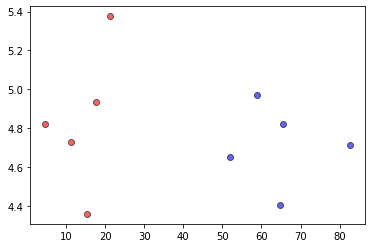

In [25]:
#劃出兩群圖
plot_scatter(C1,color='b')
plot_scatter(C2,color='r')
plt.show()

In [26]:
X_train

array([[52.03689769,  4.6506758 ],
       [65.43365585,  4.8217831 ],
       [82.61342831,  4.71050265],
       [64.74651616,  4.40140406],
       [58.76142694,  4.9681305 ],
       [ 4.6963952 ,  4.82029543],
       [17.57387875,  4.93413837],
       [15.37469799,  4.35748284],
       [21.28085699,  5.37579041],
       [11.22420911,  4.72849086]])

In [27]:
X_train.shape

(10, 2)

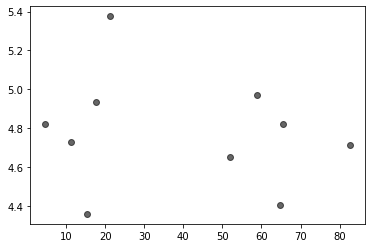

In [28]:
#將其模擬為一整筆資料，讓系統自動分成兩群
plot_scatter(X_train)
plt.show()

In [29]:
print('mean:',np.mean(X_train,axis=0))
print('std:',np.std(X_train,axis=0))

mean: [39.3741963  4.7768694]
std: [26.65006625  0.27630652]


# K-means algorithm
![](images/kmeans.png)
```    
    init : {‘k-means++’, ‘random’ or an ndarray} Method for initialization, defaults to ‘k-means++’:
    ‘k-means++’ : selects initial cluster centers for k-mean clustering in a smart way to speed up convergence.
    ‘random’: choose k observations (rows) at random from data for the initial centroids.
    If an ndarray is passed, it should be of shape (n_clusters, n_features) and gives the initial centers.
```    


In [30]:
kmeans = KMeans(init='random',n_clusters=2).fit(X_train)
kmeans

KMeans(init='random', n_clusters=2)

In [31]:
kmeans.predict([[80, 0], [100, 3]])

array([1, 1])

In [32]:
kmeans.predict([[28, 5]])

array([0])

In [33]:
kmeans.predict(X_train)

array([1, 1, 1, 1, 1, 0, 0, 0, 0, 0])

In [34]:
kmeans.cluster_centers_ #兩cluster中心座標點

array([[14.03000761,  4.84323958],
       [64.71838499,  4.71049922]])

In [35]:
X_train

array([[52.03689769,  4.6506758 ],
       [65.43365585,  4.8217831 ],
       [82.61342831,  4.71050265],
       [64.74651616,  4.40140406],
       [58.76142694,  4.9681305 ],
       [ 4.6963952 ,  4.82029543],
       [17.57387875,  4.93413837],
       [15.37469799,  4.35748284],
       [21.28085699,  5.37579041],
       [11.22420911,  4.72849086]])

In [36]:
kmeans.labels_ #會和predicts資料一樣

array([1, 1, 1, 1, 1, 0, 0, 0, 0, 0])

##    Plot Scatter
    1. 將資料點繪製成scatter圖. 請依據K-means分群後的結果來給予不同cluster有不同的顏色
       (cluster數非固定值)
    2. 將K-means中心點資料點也繪製上去並有較大圖樣

In [37]:
kmeans.predict(X_train)

array([1, 1, 1, 1, 1, 0, 0, 0, 0, 0])

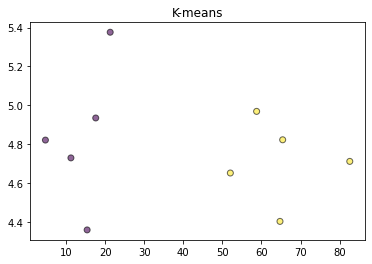

In [38]:
#作圖
plot_scatter(X_train,kmeans.predict(X_train))
plt.title("K-means")
plt.show()

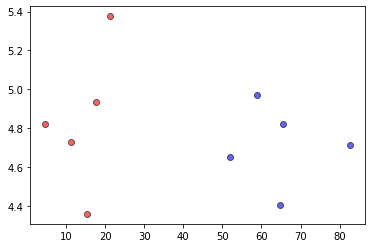

In [39]:
plot_scatter(C1,color='b')
plot_scatter(C2,color='r')
plt.show()

In [40]:
kmeans.cluster_centers_

array([[14.03000761,  4.84323958],
       [64.71838499,  4.71049922]])

In [41]:
kmeans.cluster_centers_[:,1] #cluster平均Y座標

array([4.84323958, 4.71049922])

In [42]:
kmeans.predict(X_train)

array([1, 1, 1, 1, 1, 0, 0, 0, 0, 0])

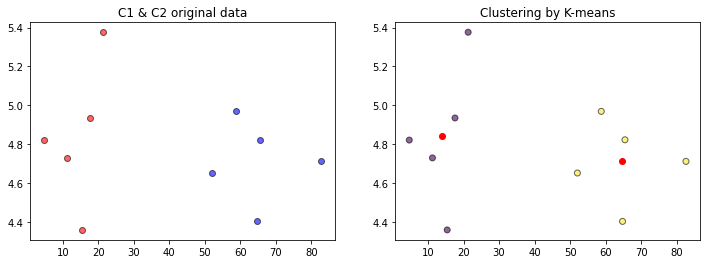

In [43]:
plt.figure(figsize=(12, 4))
plt.subplot(121)#1x2的圖，第一個
plot_scatter(C1,color='b')
plot_scatter(C2,color='r')
plt.title("C1 & C2 original data")
plt.subplot(122)#1x2的圖，第二個
plot_scatter(X_train,color=kmeans.predict(X_train))
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],c='red') #以紅點標記預測的cluster1和cluster2的中心座標
plt.title("Clustering by K-means")
plt.show()


## Agglomerative algorithm
    1) linkage : {“ward”, “complete”, “average”, “single”}, optional (default=”ward”)
    
    2.) affinity : string or callable, default: “euclidean”
    Metric used to compute the linkage. Can be “euclidean”, “l1”, “l2”, “manhattan”, “cosine”, or “precomputed”. If linkage is “ward”, only “euclidean” is accepted. If “precomputed”, a distance matrix (instead of a similarity matrix) is needed as input for the fit method.

In [44]:
from sklearn.cluster import AgglomerativeClustering
import numpy as np

In [45]:
acv = AgglomerativeClustering(n_clusters=2,linkage='single').fit(X_train)
acv

AgglomerativeClustering(linkage='single')

In [46]:
cluster_labels=acv.fit_predict(X_train)
cluster_labels

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1], dtype=int64)

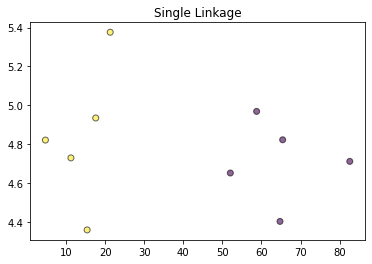

In [48]:
plot_scatter(X_train, acv.fit_predict(X_train))
plt.title("Single Linkage")
plt.show()

In [49]:
X_train

array([[52.03689769,  4.6506758 ],
       [65.43365585,  4.8217831 ],
       [82.61342831,  4.71050265],
       [64.74651616,  4.40140406],
       [58.76142694,  4.9681305 ],
       [ 4.6963952 ,  4.82029543],
       [17.57387875,  4.93413837],
       [15.37469799,  4.35748284],
       [21.28085699,  5.37579041],
       [11.22420911,  4.72849086]])

## distance matrix

In [51]:
from sklearn.metrics import pairwise_distances #算出兩成對樣本的矩陣距離
from sklearn.datasets import make_circles,make_blobs
D = np.round(pairwise_distances(X_train),1)  #直接針對X_train的十個點，做兩兩距離計算。四捨五入到小數第一位。
D

array([[ 0. , 13.4, 30.6, 12.7,  6.7, 47.3, 34.5, 36.7, 30.8, 40.8],
       [13.4,  0. , 17.2,  0.8,  6.7, 60.7, 47.9, 50.1, 44.2, 54.2],
       [30.6, 17.2,  0. , 17.9, 23.9, 77.9, 65. , 67.2, 61.3, 71.4],
       [12.7,  0.8, 17.9,  0. ,  6. , 60.1, 47.2, 49.4, 43.5, 53.5],
       [ 6.7,  6.7, 23.9,  6. ,  0. , 54.1, 41.2, 43.4, 37.5, 47.5],
       [47.3, 60.7, 77.9, 60.1, 54.1,  0. , 12.9, 10.7, 16.6,  6.5],
       [34.5, 47.9, 65. , 47.2, 41.2, 12.9,  0. ,  2.3,  3.7,  6.4],
       [36.7, 50.1, 67.2, 49.4, 43.4, 10.7,  2.3,  0. ,  6. ,  4.2],
       [30.8, 44.2, 61.3, 43.5, 37.5, 16.6,  3.7,  6. ,  0. , 10.1],
       [40.8, 54.2, 71.4, 53.5, 47.5,  6.5,  6.4,  4.2, 10.1,  0. ]])

In [53]:
D.shape[0]

10

In [54]:
def min_dist(D): #找出最近的距離點
    minimum=10000  
    min_x=0
    min_y=0
    for i in range(D.shape[0]):
        for j in range(i):           
            if D[i][j]<minimum:      #看距離是否有小於最小值，直到比完所有資料   
                minimum=D[i][j]
                min_x=i
                min_y=j
                #print(i,j,D[i][j])
                
    return (min_x,min_y),minimum

In [55]:
min_dist(D) #3和1就可以因距離短，合成一群

((3, 1), 0.8)

## plot dendrogram (樹狀圖)

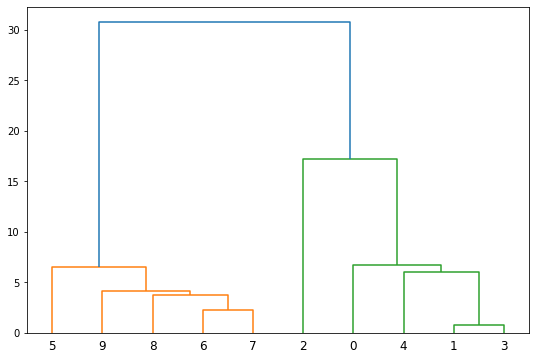

In [56]:
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
plt.figure(figsize=(9, 6))

def plot_dendrogram(x, method='ward'): #畫樹狀圖
    Z = linkage(x, method)
    dendrogram(Z)

plot_dendrogram(X_train,'single')
plt.show() #可以佐證min_dist(D)最小的兩筆資料，是否一開始就被分進同一群集裡

## Comparing different hierarchical linkage methods

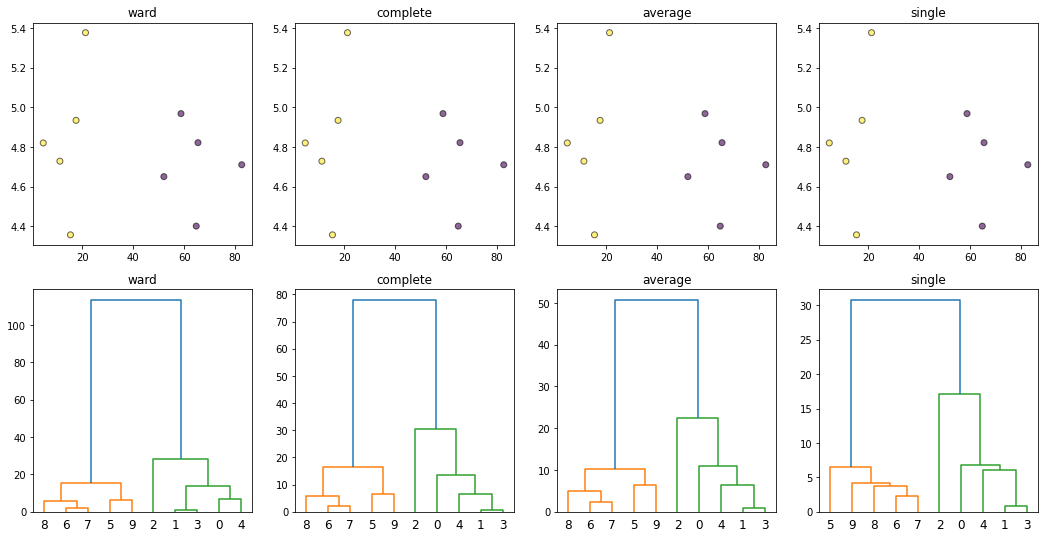

In [57]:

def compare_linkage(X):
    
    plt.figure(figsize=(18, 9))
    linktype=['ward', 'complete', 'average', 'single']

    for i,link in enumerate(linktype): #enumerate: i取index位置，link取字串內容
        model = AgglomerativeClustering(n_clusters=2,linkage=link).fit(X) #訓練
        cluster_labels=model.fit_predict(X)   #預測
        
        #plot scatter 
        plt.subplot(2,4,i+1) #2x4，第i+1個方法，做聚合樹
        plot_scatter(X, cluster_labels)
        plt.title(link)
        
        # plot dendrogram 做散點圖
        plt.subplot(2,4,i+5) #下半部        
        plot_dendrogram(X,link)
        plt.title(link)   

    plt.show()     
    
compare_linkage(X_train)

## Apply K-means with re-scaled data
### Feature Re-scale 

In [70]:
n1=5
n2=5
# cluster 1
# np.random.normal(mu,sigma,size)) 
x1 = np.random.normal(60,10, n1)  #平均60，標準差10的五個點
y1 = np.random.normal(5, 0.5,n1)  #平均5，標準差0.5的五個點
C1=np.array(list(zip(x1,y1))) #zip() 將兩者合起來
# cluster 2
x2 = np.random.normal(20,10,n2) #平均30，標準差10的五個點 #與cluster1有距離差異
y2 = np.random.normal(5,0.5,n2) #平均5，標準差0.5的五個點
C2=np.array(list(zip(x2,y2)))

X_train = np.concatenate((C1,C2)) #將5+5=10筆資料concate起來

print(np.mean(C1,axis=0))
print(np.mean(C2,axis=0))

[71.7357889  4.7014568]
[22.60146739  5.13987187]


In [71]:
X_train

array([[78.92194801,  5.00602635],
       [54.43833818,  4.42534318],
       [79.30625599,  4.78428095],
       [70.75827327,  4.4801387 ],
       [75.25412904,  4.81149484],
       [36.59178119,  5.78400461],
       [29.93179175,  5.44538337],
       [18.21150869,  5.26237475],
       [11.57230909,  4.67060742],
       [16.69994622,  4.53698919]])

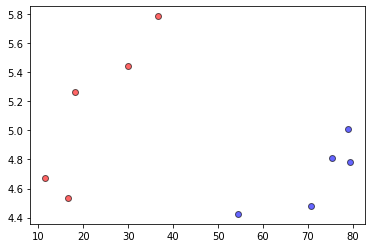

In [72]:
plot_scatter(C1,color='b')
plot_scatter(C2,color='r')
plt.show()

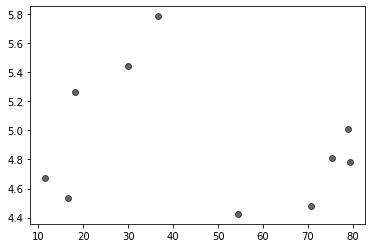

In [73]:
plot_scatter(X_train)
plt.show()

[47.16862814  4.92066434]
[26.23384711  0.42712979]


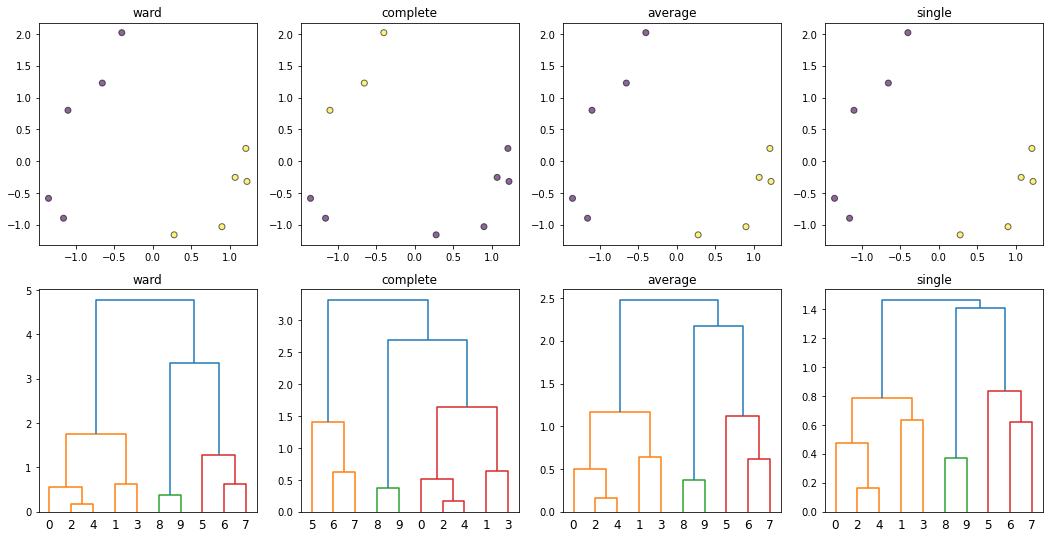

In [74]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler().fit(X_train)  #Compute the statistics to be used for later scaling.
print(sc.mean_)  #mean
print(sc.scale_) #standard deviation

#transform: (x-u)/std.
X_train_std = sc.transform(X_train)

np.round(np.mean(X_train_std,axis=0),2)

compare_linkage(X_train_std)

In [75]:
from sklearn.datasets import make_circles
# make a synthetic dataset (circle) #array of shape [n_samples, 2]
X, y = make_circles(n_samples=100, shuffle=True,factor=0.5, random_state=0, noise=0.05) 

In [76]:
print(X[:10])
print(y[:10])

[[-0.97084503 -0.12673179]
 [-0.01989117 -0.45880462]
 [ 0.95036645  0.21475102]
 [ 0.3868271   0.25685525]
 [-0.53375109 -0.00663921]
 [ 0.34970205 -0.2956982 ]
 [-0.41722927  0.81854348]
 [-0.47625865  0.08139568]
 [ 0.42783229  0.26529816]
 [ 0.36259195 -0.27483444]]
[0 1 0 1 1 1 0 1 1 1]


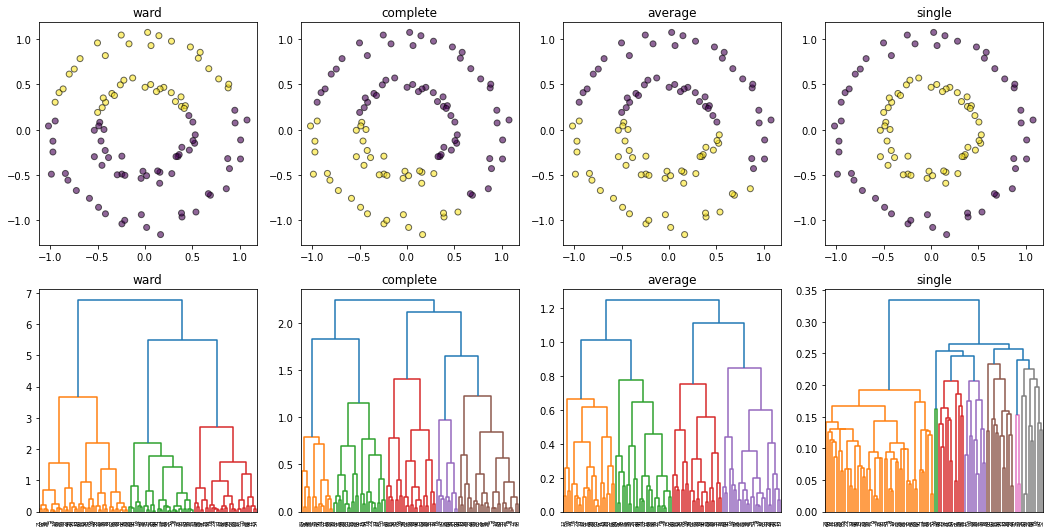

In [77]:
compare_linkage(X)

#若資料分為內外圈，用single分類會是最好的=>single=>不同群集中，最接近兩點的距離